In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'

batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6024 images belonging to 3 classes.
Found 76 images belonging to 3 classes.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install tensorflow

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(3, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=x)

In [ ]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 1362s 7s/step - accuracy: 0.6608 - loss: 0.6819 - val_accuracy: 0.6579 - val_loss: 0.6167
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 185s 709ms/step - accuracy: 0.6736 - loss: 0.5455 - val_accuracy: 0.8421 - val_loss: 0.4971
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 140s 705ms/step - accuracy: 0.6845 - loss: 0.5192 - val_accuracy: 0.6184 - val_loss: 0.6046
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 151s 765ms/step - accuracy: 0.6671 - loss: 0.5179 - val_accuracy: 0.7105 - val_loss: 0.5208
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 190s 709ms/step - accuracy: 0.6769 - loss: 0.5085 - val_accuracy: 0.6184 - val_loss: 0.6034
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 144s 721ms/step - accuracy: 0.6717 - loss: 0.5122 - val_accuracy: 0.5132 - val_loss: 0.6366
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 139s 705ms/step - accuracy: 0.6808 - loss: 0.4970 - val_accuracy: 0.5395 - val_loss: 0.6211
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 140s 719ms/step - accuracy: 0.6775 - loss: 0.4996

In [7]:
model.save('scabies_detection_model.h5')

In [ ]:

test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Confusion Matrix
[[17  0  0]
 [ 7 12  0]
 [11  0 29]]
Classification Report
               precision    recall  f1-score   support

 Healthy Skin       0.49      1.00      0.65        17
Other Objects       1.00      0.63      0.77        19
      Scabies       1.00      0.72      0.84        40

     accuracy                           0.76        76
    macro avg       0.83      0.79      0.76        76
 weighted avg       0.88      0.76      0.78        76



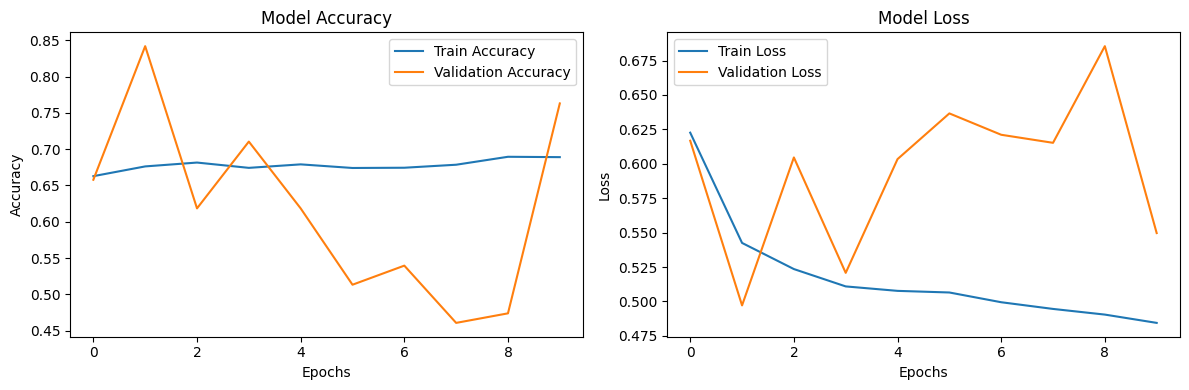

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
def predict_scabies(image_path):
    model = load_model('/content/scabies_detection_model.h5')
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    class_labels = list(train_generator.class_indices.keys())
    result = class_labels[predicted_class[0]]

    print(f"Prediction: {result}")
    return result

image_path = '/content/image2244.jpg'
predict_scabies(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Other Objects


'Other Objects'

In [11]:
image_path = '/content/diseases-symptoms-hd_849761-86109.jpg'
predict_scabies(image_path)

NameError: name 'load_model' is not defined